In [53]:
import os, sys, re
import sqlite3, csv
import argparse
from tqdm.notebook import tqdm
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import geopandas as gpd
# %pip install ipywidgets
# %pip install seaborn
# %pip install geopandas

describing all preparatory bash scripts here:
```bash
~/data/02_data$ sqlite3 results.db 'select distinct email from email' | tr '[:upper:]' '[:lower:]' | grep -oE '[a-z]+$' | sort | uniq -c | sort -nr | csvtool cat -t ' ' - >03_analyses/statistics_for_paper/email_all_tlds.csv
cd /tmp ; wget https://github.com/lorey/list-of-countries/raw/master/csv/countries.csv
csvtool -t ';' namedcol alpha_3,tld countries.csv >countries_alpha_tld.csv
wget https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
unzip ne_110m_admin_0_countries.zip
```

In [5]:
shapefile = '/tmp/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

,country,country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [20]:
#gdf.drop(gdf[gdf['country'] == 'Antarctica'].index)
gdf = gdf.drop(159)

In [43]:
data = pd.read_csv('/home/gjungwirth/data/02_data/03_analyses/statistics_for_paper/email_all_tlds.csv',names=['count','tld'])
#data

In [44]:
mappings = pd.read_csv('/tmp/countries_alpha_tld.csv')
#mappings

In [45]:
mappings['tld'] = mappings['tld'].str.lstrip('.')

In [49]:
data_with_code = data.merge(mappings)
display(data_with_code.head(3))
data_with_code = data_with_code.drop([0])
display(data_with_code.head(3))

,count,tld,alpha_3
0,384894,tv,TUV
1,47806,de,DEU
2,10238,fr,FRA


,count,tld,alpha_3
1,47806,de,DEU
2,10238,fr,FRA
3,9176,uk,GBR


In [50]:
merged = gdf.merge(data_with_code, left_on = 'country_code', right_on = 'alpha_3')

<AxesSubplot:>

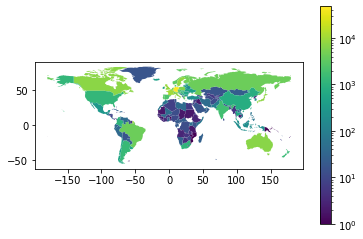

In [61]:
merged.plot("count",legend=True,
    norm=mpl.colors.LogNorm(vmin=merged['count'].min(), vmax=merged['count'].max()))